# Machine learning exercise 9-10

1. Regression models in sklearn - comparing different models
   - Introduction
   - $R^2$ score for Regression
   - Comparing different models
2. Neural network with Keras
   - Configuring
       - Architecture
       - Optimizer and loss function
   - Training
       - Visualize the obtained Accuracy and Loss
   - Improve model with dropout and regularization

## 1. Regression in sklearn
### Compare several regression models from scikit-learn


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import math

path = "../Data/"

# Load the dataset from a csv file 
wines_df = pd.read_csv(path + "winequality-red.csv")
wines_df.info()
wines_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


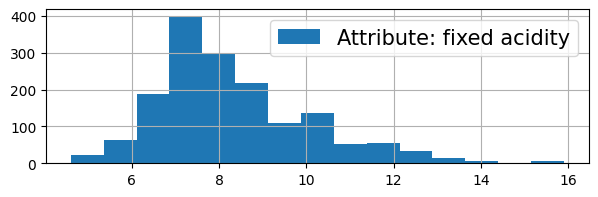

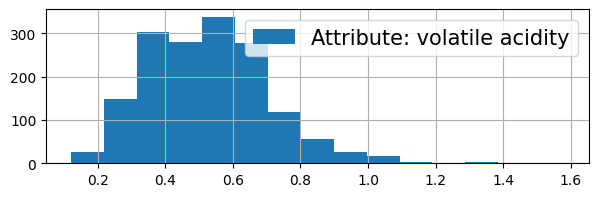

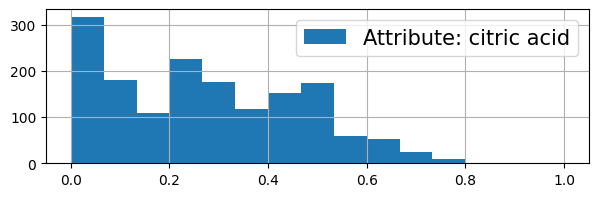

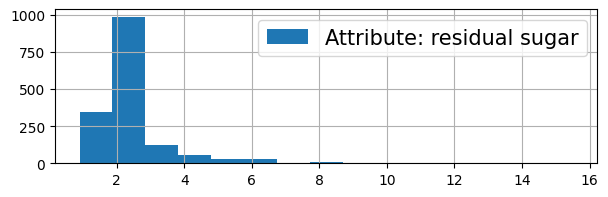

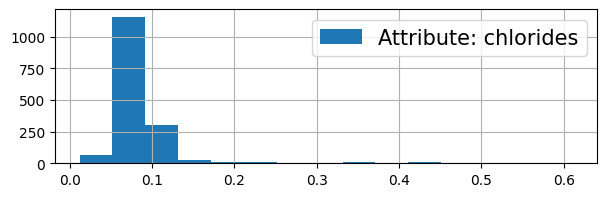

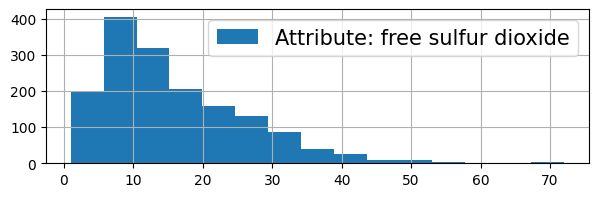

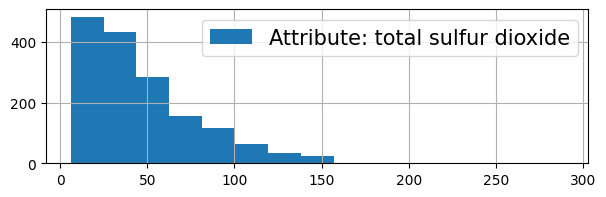

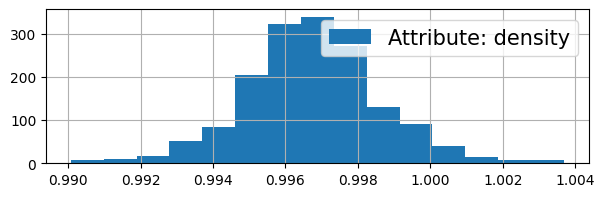

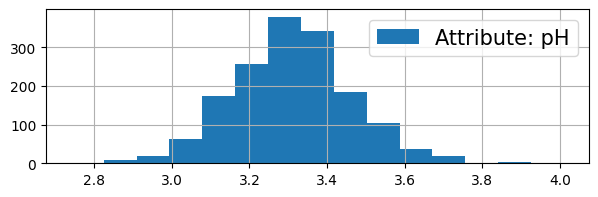

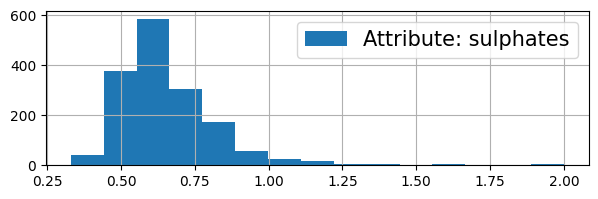

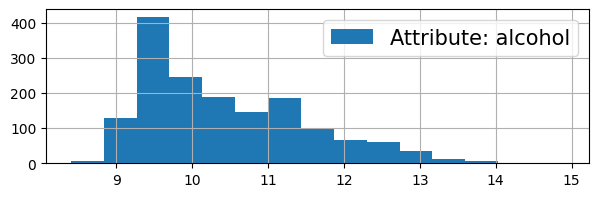

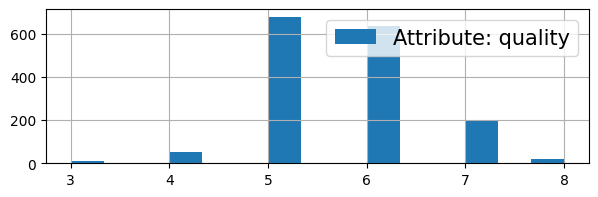

In [2]:
import matplotlib.pyplot as plt

i=0
for column in wines_df:
    s = wines_df[column]
    fig, ax = plt.subplots(figsize=(7,2))
    s.hist(bins=15)
    ax.legend(['Attribute: '+ column], fontsize=15)

In [3]:
X = wines_df.drop(['quality'], axis=1)  # Explanatory
Y = wines_df['quality']  # Explained

Use train `train_test_split` to split into random datasets. 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


Normalize each instance with `sklearn.preprocessing.Normalizer`

In [5]:
from sklearn.preprocessing import Normalizer

nrm = Normalizer(norm='l2', copy=True)

# Scale each non zero row to unit norm
X_train_norm = nrm.fit_transform(X_train)  # Training set
X_test_norm = nrm.transform(X_test)  # Test set

X_norm = nrm.transform(X)

`globals()` returns a dictionary of the current global symbol table. <br>
Symbol table: data structure about all necessary info about the program, like variable name, method, classes. <br>
We will use it to retrieve a set of different Regressors from sklearn.

In [6]:
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.neighbors import *

globals_dict = globals().items()

models = [model for name, model in globals_dict if
          hasattr(model, '__name__') and \
          hasattr(model, 'fit') and \
          not hasattr(model, 'predict_proba') and \
          #not model.__name__.endswith('CV') and \
          #'Logistic' not in model.__name__ and \
          'Regr' in model.__name__
         ]

print(len(models))

22


In [7]:
import pprint  # pretty-printer
# 'pretty-print' arbitrary Python data structures - print in a well formatted way

pprint.pprint(models)

[<class 'sklearn.linear_model._bayes.ARDRegression'>,
 <class 'sklearn.linear_model._huber.HuberRegressor'>,
 <class 'sklearn.linear_model._base.LinearRegression'>,
 <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveRegressor'>,
 <class 'sklearn.linear_model._quantile.QuantileRegressor'>,
 <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>,
 <class 'sklearn.linear_model._theil_sen.TheilSenRegressor'>,
 <class 'sklearn.linear_model._ransac.RANSACRegressor'>,
 <class 'sklearn.linear_model._glm.glm.PoissonRegressor'>,
 <class 'sklearn.linear_model._glm.glm.GammaRegressor'>,
 <class 'sklearn.linear_model._glm.glm.TweedieRegressor'>,
 <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>,
 <class 'sklearn.ensemble._forest.RandomForestRegressor'>,
 <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>,
 <class 'sklearn.ensemble._bagging.BaggingRegressor'>,
 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>,
 <class 'sklearn.ensemble._weigh

### $R^2$ metric
$R^2$(coefficient of determination) regression score function
- Best score = 1
- Can be negative - the model can be arbitrarily worse
- A constant model that always predict the expected value of y, disregarding the input features has $R^2$ = 0

In [8]:
from sklearn.metrics import r2_score

def score_model(model, train_set_x, train_set_y, test_set_x, test_set_y):
    """ Fit the model and return the R2 score, 
        calculated using the ground truth y_test 
    """

    try:
        # Fit the (regression) model 
        model.fit(train_set_x, train_set_y)
    except Exception as e:
        raise Exception("Cannot fit the model '{0}' ! ".format(model.__name__)) from e
    
    # Predict the instances from the Test set
    predicted = model.predict(test_set_x)
    
    # Compare to ground truth and evaluate score
    score = r2_score(test_set_y, predicted)
    
    return score


In [9]:
from time import perf_counter

r2_scores = []
m_names = []
eval_times = []
regressors = {}

for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression', 'VotingRegressor', 'StackingRegressor'}:
        continue

    try:
        regressor = model()
    except Exception as e:
        print ('Skipped', model)
        continue

    start = perf_counter()
    
    regression_score = score_model(regressor, X_train_norm, Y_train, X_test_norm, Y_test)
    
    sys_time = perf_counter() - start
    
    r2_scores.append(regression_score)
    m_names.append(model.__name__)
    eval_times.append(sys_time)
    regressors[model.__name__] = regressor

    print(i, model.__name__, regression_score, sys_time)

1 HuberRegressor 0.3476358726299358 0.04158709989860654
2 LinearRegression 0.33708460879781 0.015299000078812242
3 PassiveAggressiveRegressor -4.235368184611352 0.003988600103184581
4 QuantileRegressor -0.17141162514828 0.09100819984450936
5 SGDRegressor 0.03920969258414342 0.004609100054949522


C:\Python\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


6 TheilSenRegressor 0.32734180379885447 1.0445206998847425
7 RANSACRegressor 0.04080976427293481 0.13240529992617667
8 PoissonRegressor 0.01578741785168858 0.09864600002765656
9 GammaRegressor 0.0024994731988869923 0.0031204000115394592
10 TweedieRegressor 0.002535690195838103 0.0027395000215619802


C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


11 MLPRegressor 0.08227123006519321 0.686803299933672
12 RandomForestRegressor 0.43658548339264536 1.2367110000923276
13 ExtraTreesRegressor 0.4721378262158955 0.4394240998663008
14 BaggingRegressor 0.39068060498220636 0.14288619998842478
15 GradientBoostingRegressor 0.3798479121855891 0.6733419001102448
16 AdaBoostRegressor 0.25098844945560816 0.2832146000582725
19 HistGradientBoostingRegressor 0.44292219931680177 0.33451119996607304
20 KNeighborsRegressor 0.11061684460260979 0.008919500047340989
21 RadiusNeighborsRegressor -0.0018239989709558646 0.046367299975827336


C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [10]:
dict_model_performance = {"Model": m_names, "R2": r2_scores, "SysTime": eval_times}
model_perf_df = pd.DataFrame(dict_model_performance)

model_perf_df.sort_values("R2", ascending=False)


,Model,R2,SysTime
12,ExtraTreesRegressor,0.472138,0.439424
16,HistGradientBoostingRegressor,0.442922,0.334511
11,RandomForestRegressor,0.436585,1.236711
13,BaggingRegressor,0.390681,0.142886
14,GradientBoostingRegressor,0.379848,0.673342
0,HuberRegressor,0.347636,0.041587
1,LinearRegression,0.337085,0.015299
5,TheilSenRegressor,0.327342,1.044521
15,AdaBoostRegressor,0.250988,0.283215
17,KNeighborsRegressor,0.110617,0.008920


In [11]:
model_perf_df_filtered = model_perf_df[model_perf_df["R2"] >= 0]
model_perf_df_filtered

,Model,R2,SysTime
0,HuberRegressor,0.347636,0.041587
1,LinearRegression,0.337085,0.015299
4,SGDRegressor,0.039210,0.004609
5,TheilSenRegressor,0.327342,1.044521
6,RANSACRegressor,0.040810,0.132405
7,PoissonRegressor,0.015787,0.098646
8,GammaRegressor,0.002499,0.003120
9,TweedieRegressor,0.002536,0.002740
10,MLPRegressor,0.082271,0.686803
11,RandomForestRegressor,0.436585,1.236711


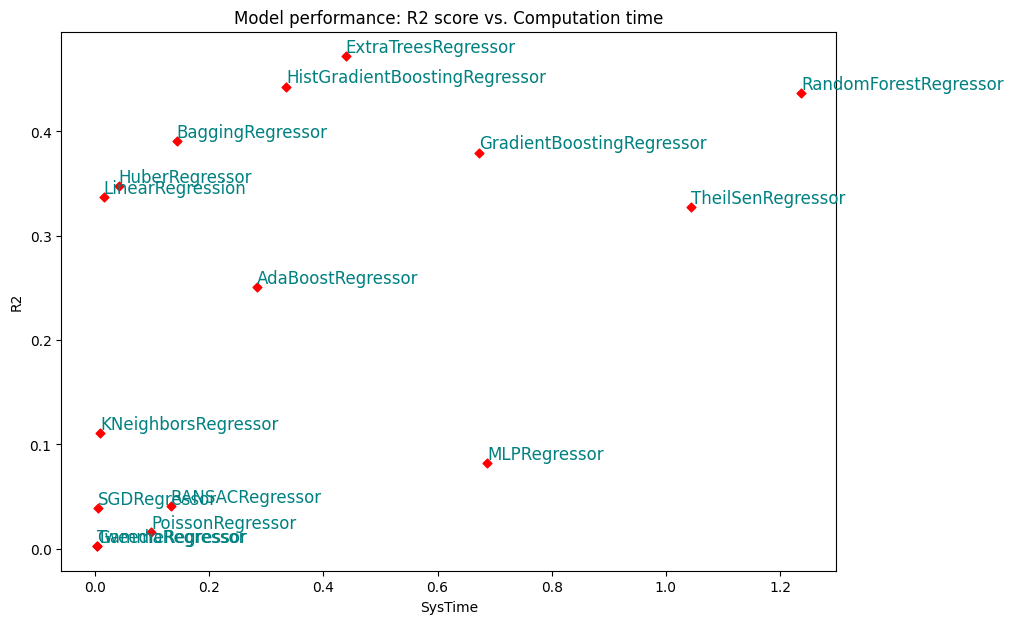

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

model_perf_df_filtered.plot(x='SysTime', y='R2', kind="scatter", marker='D', color='r', ax=ax)

for index, row in model_perf_df_filtered.iterrows():
    x_pos = row['SysTime']
    y_pos = row['R2']
    ax.text(x_pos, y_pos, row['Model'], rotation=0, ha='left', va='bottom', color='teal', size=12)
        
ax.set_title("Model performance: R2 score vs. Computation time");

In [13]:
pred = regressors['RANSACRegressor'].predict(X_test_norm)
#pred = regressors['MLPRegressor'].predict(X_test_norm)
pred[1:5]

array([5.11611596, 7.03575771, 5.46942295, 5.82931459])

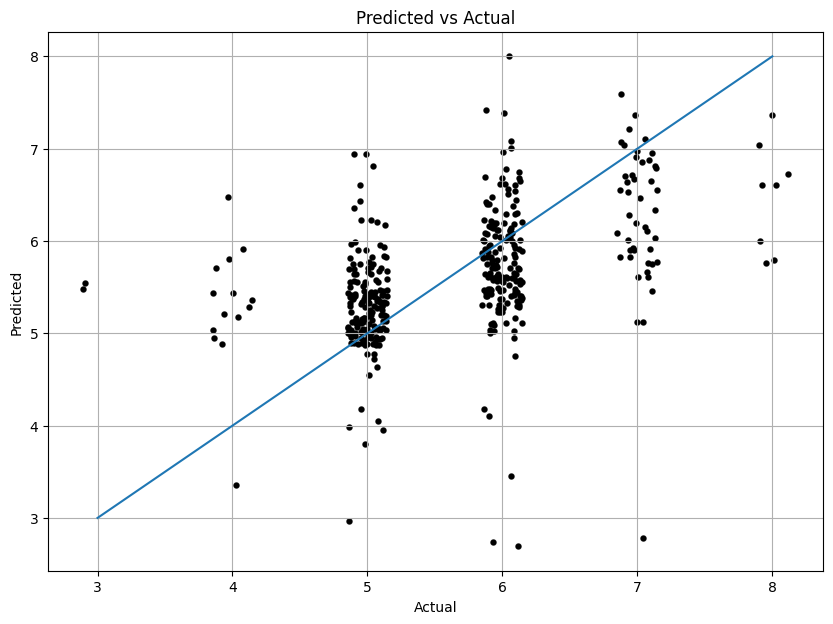

In [14]:
predicted_vs_expected = {"Predicted":pred, "Actual":Y_test}
df = pd.DataFrame(predicted_vs_expected)

jitter = (np.random.random(df.shape[0]) - 0.5) * 0.3
df['Actual'] += jitter

ax = df.plot(x="Actual", y="Predicted", kind='scatter', color="k", figsize=(10, 7), linewidths=.1, grid=True, linestyle='-')
ax.set_title('Predicted vs Actual')
plt.plot([3, 8], [3, 8])

C:\Python\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'size'
  cset = contour_func(


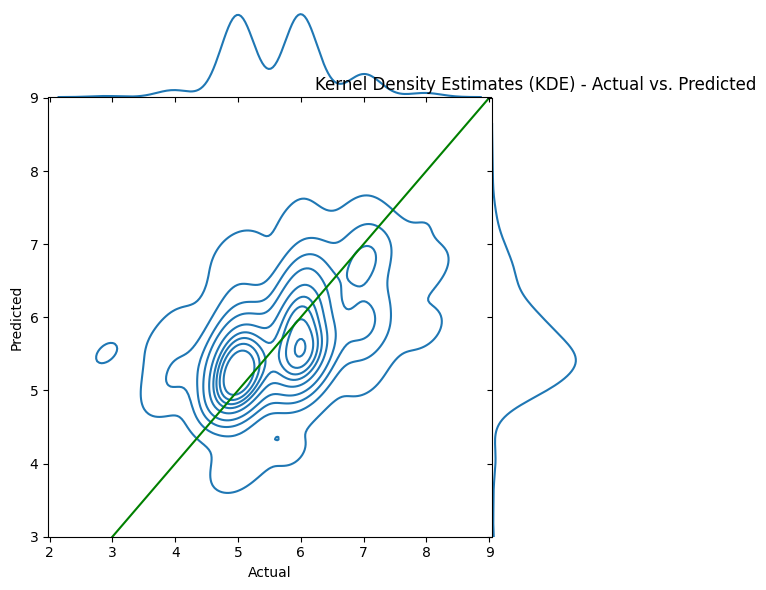

In [15]:
import seaborn as sns

ax = sns.jointplot(x=df["Actual"], y=df["Predicted"], kind="kde", size=8, space=.01, ylim=(3, 9))

ax.ax_marg_y.set_title('Kernel Density Estimates (KDE) - Actual vs. Predicted')
ax.plot_joint(plt.scatter, marker="")
plt.plot((3, 9), (3, 9), color="g")


In [16]:
tmp_df = pd.DataFrame(predicted_vs_expected)
sv = tmp_df.sort_values(['Actual', 'Predicted']).reset_index(drop=True)
print(tmp_df)

      Predicted  Actual
995    5.561193       6
12     5.116116       5
413    7.035758       7
1378   5.469423       6
869    5.829315       6
...         ...     ...
1248   6.183909       6
354    5.292921       6
820    5.193879       5
4      5.154865       5
360    4.955938       5

[400 rows x 2 columns]


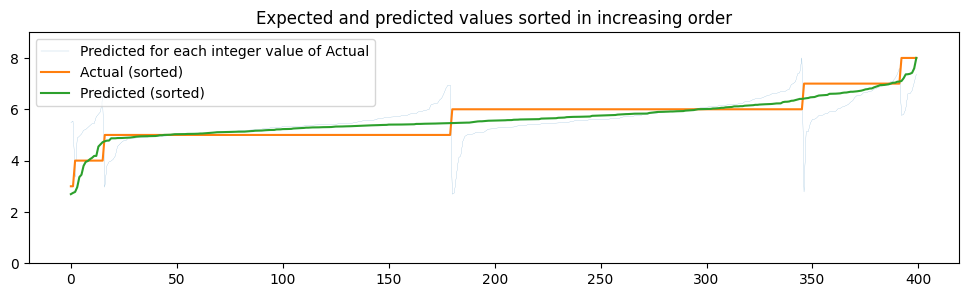

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(sv["Predicted"], label="Predicted for each integer value of Actual", lw=0.1)

ax.plot(list(sorted(tmp_df["Actual"])), label="Actual (sorted)")
ax.plot(list(sorted(tmp_df["Predicted"])), label="Predicted (sorted)")

ax.set_ylim([0, 9])
ax.set_title('Expected and predicted values sorted in increasing order')
ax.legend();

In [18]:
regressors['RANSACRegressor'].estimator_.intercept_

np.float64(4.333611998837609)

In [19]:
import numpy.random
rnd = numpy.random.permutation(range(X_norm.shape[0]))

x_norm_rand = X_norm[rnd, :]
y_rand = Y[rnd]

print(x_norm_rand.shape, y_rand.shape)

(1599, 11) (1599,)


In [20]:
from sklearn.model_selection import cross_val_score

def score_model_cross(xn, Y, model):
    result = cross_val_score(model, xn, Y, cv=10)
    return result.mean(), min(result), max(result)

# Print mean, min, max
print(score_model_cross(x_norm_rand, y_rand, LinearRegression()))
print(score_model_cross(x_norm_rand, y_rand, LogisticRegression()))

(np.float64(0.3430930741620701), np.float64(0.20012439084143985), np.float64(0.5051823953360728))
(np.float64(0.5053223270440251), np.float64(0.45), np.float64(0.54375))


In [21]:
from time import perf_counter 

r2_scores = []
min_li = []
max_li = []

m_names = []
eval_times = []
regressors = {}

for i, model in enumerate(models):
    
    if model.__name__ in {'ARDRegression', 'VotingRegressor'}:
        continue
    try:
        regressor = model()
    except Exception as e:
        print('Skip', model)
        continue
    
    start = perf_counter()
    
    r2score_mean, min_tmp, max_tmp = score_model_cross(x_norm_rand, y_rand, regressor)
    sys_time = perf_counter() - start
    
    r2_scores.append(r2score_mean)
    min_li.append(min_tmp)
    max_li.append(max_tmp)
    
    m_names.append(model.__name__)
    eval_times.append(sys_time)
    regressors[model.__name__] = regressor
    
    print("{0}: {1} Mean R2={2}, min={3}, max={4}, time: {5}"
          .format(i, model.__name__, r2score_mean, min_tmp, max_tmp, sys_time))

C:\Python\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Python\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Python\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

1: HuberRegressor Mean R2=0.33369907742279603, min=0.19065661201271256, max=0.49359414595751017, time: 0.41161920013837516
2: LinearRegression Mean R2=0.3430930741620701, min=0.20012439084143985, max=0.5051823953360728, time: 0.25221800012513995
3: PassiveAggressiveRegressor Mean R2=-1.4091838341529057, min=-7.128625509021726, max=0.3111956627272161, time: 0.04965900001116097
4: QuantileRegressor Mean R2=-0.21561569100133085, min=-0.3042778288868442, max=-0.06997480131808476, time: 1.077074300032109
5: SGDRegressor Mean R2=0.04169557706638096, min=0.002288414218579282, max=0.07453931442087691, time: 0.04917030013166368
6: TheilSenRegressor Mean R2=0.3098518662547572, min=0.1516571412282075, max=0.4794644981758823, time: 11.20669630006887
7: RANSACRegressor Mean R2=-0.020893019697096903, min=-0.21778372172001803, max=0.2571182125231969, time: 1.1361603999976069
8: PoissonRegressor Mean R2=0.013516506431957852, min=-0.013178254638395392, max=0.026980119273050218, time: 0.0572661000769585

C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum 

11: MLPRegressor Mean R2=0.10854744412780755, min=0.055564301570347197, max=0.14062227266797522, time: 8.559675200143829
12: RandomForestRegressor Mean R2=0.42759728188360013, min=0.22444714811407573, max=0.5825221171055996, time: 16.52718980005011
13: ExtraTreesRegressor Mean R2=0.477855403032044, min=0.2848413063477464, max=0.5776180005113782, time: 4.931328299921006
14: BaggingRegressor Mean R2=0.3763436142948574, min=0.26118896228162236, max=0.5036563538736896, time: 1.6818909998983145
15: GradientBoostingRegressor Mean R2=0.3369359627589448, min=0.13959099686975707, max=0.4664138284073063, time: 7.546979800099507
16: AdaBoostRegressor Mean R2=0.1990293116858706, min=0.04550723832971815, max=0.33320536268526213, time: 2.2890241998247802
Skip <class 'sklearn.ensemble._stacking.StackingRegressor'>
19: HistGradientBoostingRegressor Mean R2=0.41535462306752563, min=0.2506312506270605, max=0.5111209061920675, time: 3.3272496999707073
20: KNeighborsRegressor Mean R2=0.08943097597066266, 

C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Python\Lib\site-packages\numpy\

In [22]:
dict_tmp = {"Model":m_names, "R2":r2_scores, "Min":min_li, "Max":max_li, "Time":eval_times}
df_compare = pd.DataFrame(dict_tmp)

df_compare = df_compare[['Model', 'R2', 'Min', 'Max', 'Time']]
df_compare.sort_values('R2')

,Model,R2,Min,Max,Time
2,PassiveAggressiveRegressor,-1.409184,-7.128626,0.311196,0.049659
3,QuantileRegressor,-0.215616,-0.304278,-0.069975,1.077074
6,RANSACRegressor,-0.020893,-0.217784,0.257118,1.136160
18,RadiusNeighborsRegressor,-0.005702,-0.024489,-0.000160,0.154068
9,TweedieRegressor,-0.001054,-0.021839,0.005587,0.058225
8,GammaRegressor,-0.000968,-0.022311,0.005558,0.056121
7,PoissonRegressor,0.013517,-0.013178,0.026980,0.057266
4,SGDRegressor,0.041696,0.002288,0.074539,0.049170
17,KNeighborsRegressor,0.089431,-0.095106,0.220830,0.077530
10,MLPRegressor,0.108547,0.055564,0.140622,8.559675


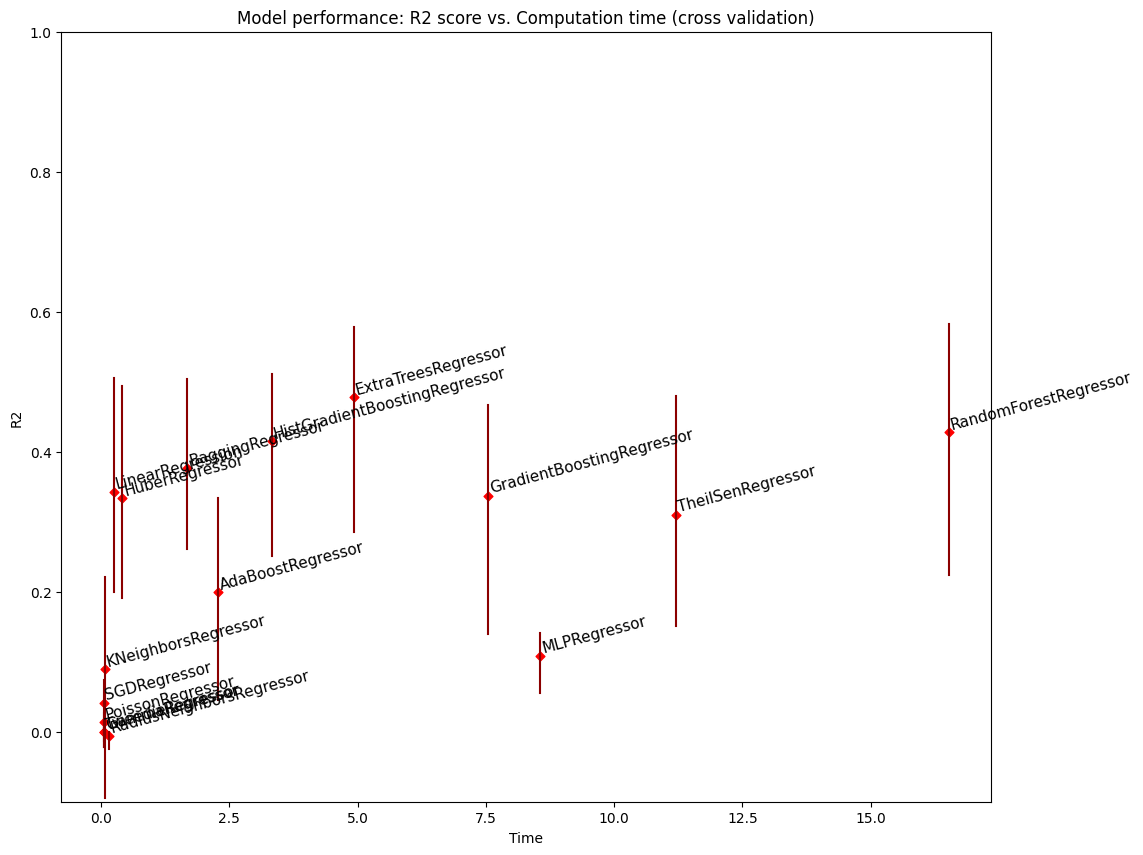

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

df_compare2 = df_compare[df_compare['Min'] > -0.1]
df_compare2.plot(x='Time', y='R2', kind="scatter", marker='D', color='r', ax=ax)

for index, row in df_compare2.iterrows():
    
    x_pos = row['Time']
    y_pos = row['R2']
    
    minn = row['Min']
    maxx = row['Max']
    
    # Lines from Min to Max
    ax.plot([x_pos, x_pos], [minn, maxx], color="darkred")
    
    # Model name
    ax.text(x_pos, y_pos, row['Model'],  rotation=15, ha='left', va='bottom', color='k', size=11)
        
ax.set_ylim([-0.1, 1])
ax.set_title("Model performance: R2 score vs. Computation time (cross validation)");

## 2. Neural net with Keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../Data/"

df = pd.read_csv(path + "email_spam_classification.csv")
dataset = df.values
dataset = dataset[:, 1:]

#dataset

In [3]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [13]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

print(X_scale.min())
print(X_scale.mean())
print(X_scale.max())

0.0
0.006232487685752355
1.0
object
object


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.25)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [6]:
print(X_train.shape,  Y_train.shape)

(3879, 3000) (3879,)


In [7]:
print(X_val.shape, Y_val.shape)

(646, 3000) (646,)


In [8]:
print(X_test.shape, Y_test.shape)

(647, 3000) (647,)


### Configuring a Neural network with keras
Specify the architecture
<br> 
- `keras.models.Sequential`: Configures the model for training - easily describe the network layers in a sequence
- `keras.layers.Dense`: Configures a fully-connected layer

In [9]:
from keras.models import Sequential 
from keras.layers import Dense

NUM_INPUTS = X_train.shape[1]

networkLayers = [Dense(48, activation='relu', input_shape=(NUM_INPUTS,)),
                Dense(32, activation='relu'),
                Dense(1, activation='sigmoid')]

model = Sequential(networkLayers)

C:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Specify the optimizer and loss function 
`"sqd"` - Stohastic gradient descent <br>
`binary_crossentropy` - log loss - will favor models that distinguish more strongly the two classes

In [11]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# X_train = np.array(X_train, dtype='float32')
# Y_train = np.array(Y_train, dtype='float32')
# X_validation = np.array(X_validation, dtype='float32')
# Y_validation = np.array(Y_validation, dtype='float32')
# X_test = np.array(X_test, dtype='float32')
# Y_test = np.array(Y_test, dtype='float32')

In [15]:
print(X_train.dtype)
print(Y_train.dtype)
print("\n")
print(X_test.dtype)
print(Y_test.dtype)
print("\n")
print(X_val.dtype)
print(Y_val.dtype)

float64
object


float64
object


float64
object
float64


In [16]:
Y_train = np.array(Y_train, dtype=np.float64)
Y_test = np.array(Y_test, dtype=np.float64)
Y_val = np.array(Y_val, dtype=np.float64)

In [17]:
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(X_val, Y_val)
                    )

Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6224 - loss: 0.6769 - val_accuracy: 0.6981 - val_loss: 0.6351
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.6220 - val_accuracy: 0.6981 - val_loss: 0.6108
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.6061 - val_accuracy: 0.6981 - val_loss: 0.6007
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5830 - val_accuracy: 0.6981 - val_loss: 0.5940
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7104 - loss: 0.5820 - val_accuracy: 0.6997 - val_loss: 0.5862
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7229 - loss: 0.5676 - val_accuracy: 0.7074 - val_loss: 0.5769
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5577 - val_accuracy: 0.7090 - val_loss: 0.5655
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7232 - loss: 0.5485 - val_accu

In [18]:
eval_model = model.evaluate(X_test, Y_test) 

print("Accuracy: {}".format(eval_model[1]))
print("Loss: {}".format(eval_model[0]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.0798 
Accuracy: 0.9768160581588745
Loss: 0.0721171423792839


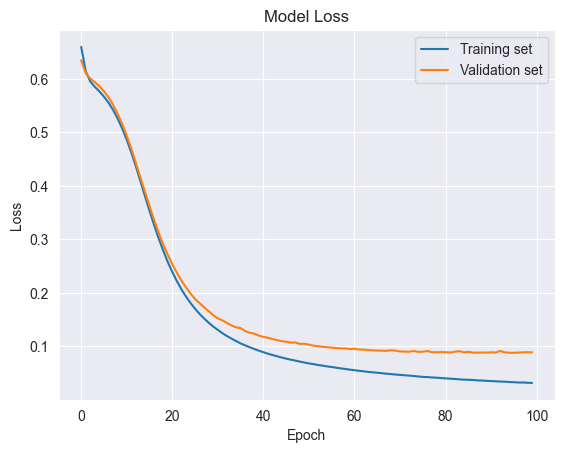

In [19]:
loss_hist = history.history['loss'] # Retrieve the loss in function of the epoch for the training set
loss_hist_validation = history.history['val_loss'] # Retrieve the loss in function of the epoch for the validation set

plt.plot(loss_hist)
plt.plot(loss_hist_validation)

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Training set', 'Validation set'], loc="upper right")

plt.show()

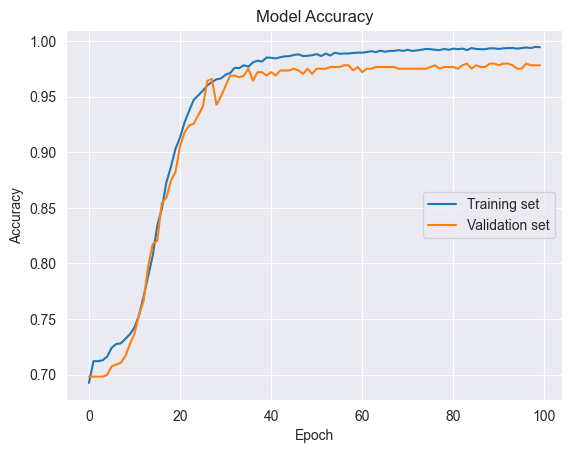

In [20]:
acc_hist = history.history['accuracy']
acc_hist_validation = history.history['val_accuracy']

plt.plot(acc_hist)
plt.plot(acc_hist_validation)

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training set', 'Validation set'], loc='center right')

plt.show()



`kernel_regularizer`: include the weight into the loss function <br>
`dropout`: randomly setting the outgoing edges of hidden units to 0 at each training

Нещо гърми ly_2 и ly_3

In [21]:
ly_2 = [Dense(100, activation='relu', input_shape=(NUM_INPUTS, )), 
        Dense(100, activation='relu'), 
        Dense(100, activation='relu'), 
        Dense(100, activation='relu'), 
        Dense(1, activation='sigmoid')]

model_2 = Sequential(ly_2)

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_val, Y_val)) 

Epoch 1/50


C:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7994 - loss: 0.4124 - val_accuracy: 0.9768 - val_loss: 0.0842
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0394 - val_accuracy: 0.9721 - val_loss: 0.0862
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9924 - loss: 0.0265 - val_accuracy: 0.9737 - val_loss: 0.0897
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9939 - loss: 0.0099 - val_accuracy: 0.9737 - val_loss: 0.1334
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9799 - val_loss: 0.1254
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.9783 - val_loss: 0.1537
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9830 - val_loss: 0.1569
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0017 - val_accuracy: 0.9752 - val_

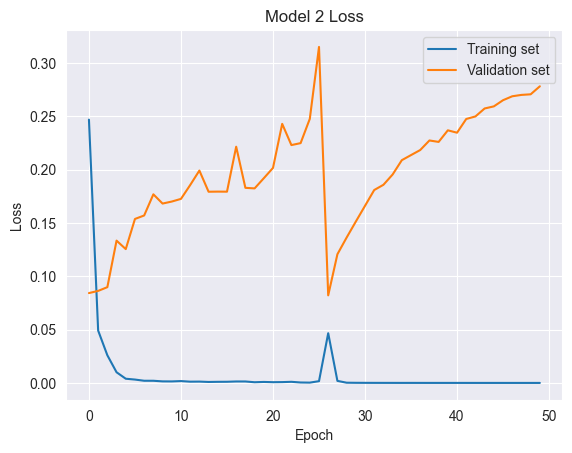

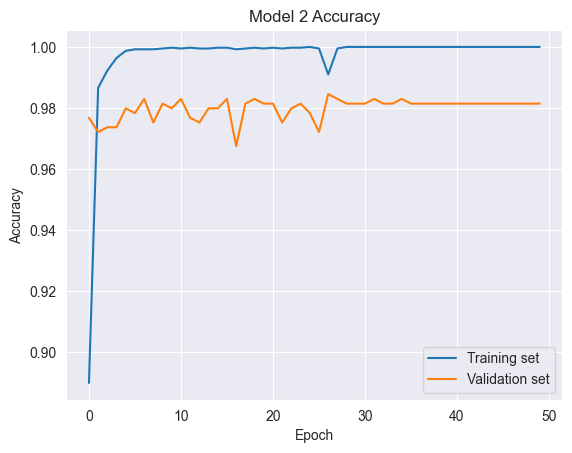

In [22]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training set', 'Validation set'], loc="upper right")
plt.show()


plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training set', 'Validation set'], loc="lower right")
plt.show()

In [23]:
from keras.layers import Dropout
from keras import regularizers

ly_3 = [Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(NUM_INPUTS, )), 
        Dropout(0.3), 
        Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
        Dropout(0.3), 
        Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
        Dropout(0.3), 
        Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
        Dropout(0.3), 
        Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)) 
       ]


model_3 = Sequential(ly_3)

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_val, Y_val)) 


Epoch 1/50


C:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7175 - loss: 3.1383 - val_accuracy: 0.8978 - val_loss: 0.7573
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9278 - loss: 0.6130 - val_accuracy: 0.9675 - val_loss: 0.4098
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.4258 - val_accuracy: 0.9768 - val_loss: 0.3859
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.4266 - val_accuracy: 0.9737 - val_loss: 0.3839
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.3728 - val_accuracy: 0.9721 - val_loss: 0.3854
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9715 - loss: 0.3662 - val_accuracy: 0.9613 - val_loss: 0.4052
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9693 - loss: 0.3768 - val_accuracy: 0.9520 - val_loss: 0.4136
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.3718 - val_accuracy: 0.9303 - val_

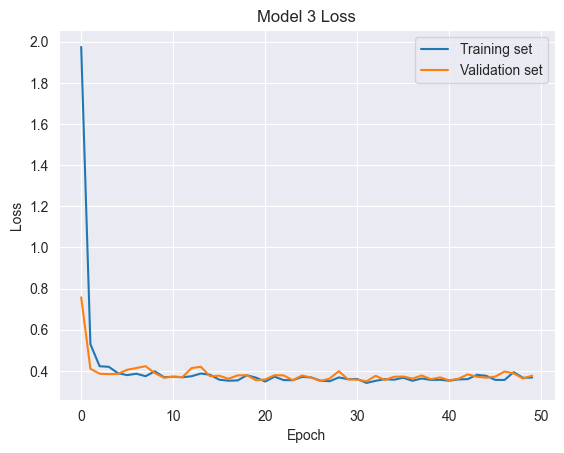

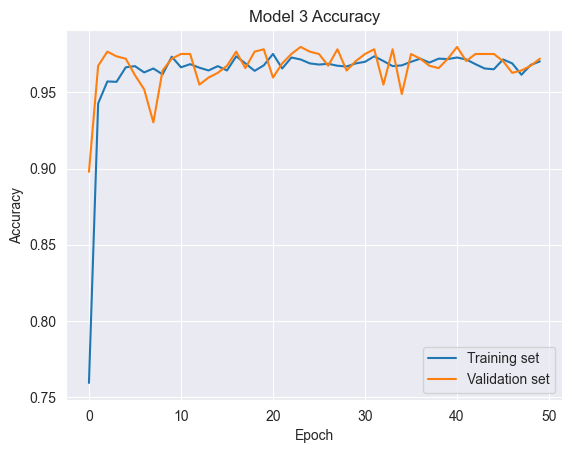

In [24]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training set', 'Validation set'], loc="upper right")
plt.show()


plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])

plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training set', 'Validation set'], loc="lower right")
plt.show()